# Run scLAMBDA on the Perturb-seq dataset from Norman et al.

In [1]:
import pandas as pd
import anndata as ad
import numpy as np
import scanpy as sc
import sclambda

from sklearn import preprocessing
import matplotlib.pyplot as plt

## Load gene embeddings and Perturb-seq data

In [2]:
gene_embeddings = pd.read_pickle('./data/GPT_3_5_gene_embeddings_3-large.pickle')

adata_processed = ad.read_h5ad('./data/adata_norman_preprocessed.h5ad')
adata_processed.var.index = adata_processed.var['symbol']

n_split = 0
adata_processed, split = sclambda.utils.data_split(adata_processed, seed=n_split)

## Showing the dataset splitting

In [3]:
print('Training perturbations:')
print(split['train'])

Training perturbations:
['AHR+ctrl', 'ARID1A+ctrl', 'ARRDC3+ctrl', 'ATL1+ctrl', 'BAK1+ctrl', 'BCL2L11+ctrl', 'BCORL1+ctrl', 'BPGM+ctrl', 'CBARP+ctrl', 'CBL+ctrl', 'CDKN1A+ctrl', 'CDKN1C+ctrl', 'CEBPA+ctrl', 'CEBPE+ctrl', 'CELF2+ctrl', 'CITED1+ctrl', 'CKS1B+ctrl', 'CNNM4+ctrl', 'COL1A1+ctrl', 'COL2A1+ctrl', 'DLX2+ctrl', 'DUSP9+ctrl', 'EGR1+ctrl', 'ETS2+ctrl', 'FEV+ctrl', 'FOSB+ctrl', 'FOXA1+ctrl', 'FOXA3+ctrl', 'FOXF1+ctrl', 'FOXL2+ctrl', 'HOXB9+ctrl', 'HOXC13+ctrl', 'IGDCC3+ctrl', 'ISL2+ctrl', 'JUN+ctrl', 'KIF18B+ctrl', 'KIF2C+ctrl', 'KLF1+ctrl', 'KMT2A+ctrl', 'LHX1+ctrl', 'LYL1+ctrl', 'MAML2+ctrl', 'MAP2K3+ctrl', 'MAP3K21+ctrl', 'MAP4K3+ctrl', 'MAP4K5+ctrl', 'MAP7D1+ctrl', 'MAPK1+ctrl', 'MIDN+ctrl', 'NIT1+ctrl', 'POU3F2+ctrl', 'PRTG+ctrl', 'PTPN12+ctrl', 'PTPN13+ctrl', 'RHOXF2+ctrl', 'RREB1+ctrl', 'SAMD1+ctrl', 'SGK1+ctrl', 'SLC38A2+ctrl', 'SLC4A1+ctrl', 'SPI1+ctrl', 'STIL+ctrl', 'TBX2+ctrl', 'TGFBR2+ctrl', 'TSC22D1+ctrl', 'UBASH3A+ctrl', 'ZBTB1+ctrl', 'ZBTB25+ctrl', 'ZC3HAV1+ctrl', '

In [4]:
print('Validating perturbations:')
print(split['val_subgroup'])

Validating perturbations:
{'combo_seen0': [], 'combo_seen1': ['TMSB4X+BAK1', 'CEBPB+PTPN12', 'FOSB+CEBPB', 'LYL1+CEBPB', 'CEBPB+MAPK1', 'CEBPE+CEBPB', 'CEBPE+RUNX1T1'], 'combo_seen2': ['AHR+KLF1', 'CBL+UBASH3A', 'DUSP9+IGDCC3', 'KLF1+COL2A1', 'KLF1+TGFBR2'], 'unseen_single': ['CEBPB+ctrl', 'HES7+ctrl', 'HNF4A+ctrl', 'HOXA13+ctrl', 'PTPN1+ctrl', 'RUNX1T1+ctrl', 'TMSB4X+ctrl', 'TP73+ctrl']}


In [5]:
print('Testing perturbations:')
print(split['test_subgroup'])

Testing perturbations:
{'combo_seen0': ['IRF1+SET', 'MAP2K6+IKZF3', 'MAP2K6+MIDEAS', 'PRDM1+CBFA2T3', 'SNAI1+UBASH3B', 'UBASH3B+CNN1', 'UBASH3B+OSR2', 'UBASH3B+PTPN9', 'ZBTB10+MIDEAS', 'ZBTB10+SNAI1'], 'combo_seen1': ['MAP2K3+IKZF3', 'KLF1+MAP2K6', 'TBX3+TBX2', 'CBL+PTPN9', 'SGK1+TBX3', 'DUSP9+SNAI1', 'SET+KLF1', 'LYL1+IER5L', 'RHOXF2+SET', 'POU3F2+CBFA2T3', 'UBASH3B+PTPN12', 'KLF1+CLDN6', 'PTPN12+PTPN9', 'ETS2+CNN1', 'UBASH3B+ZBTB25', 'PTPN12+OSR2', 'SET+CEBPE', 'CEBPE+CNN1', 'CBL+UBASH3B', 'PTPN12+SNAI1', 'MAP2K3+MIDEAS', 'UBASH3B+UBASH3A', 'ETS2+IKZF3', 'MAPK1+IKZF3', 'CDKN1B+CDKN1A', 'CBL+CNN1', 'LHX1+MIDEAS', 'FOSB+OSR2', 'ZBTB10+PTPN12', 'ZBTB10+DLX2', 'SGK1+S1PR2', 'MAP2K6+SPI1', 'CEBPB+OSR2', 'FOXL2+MEIS1', 'FEV+CBFA2T3', 'MAP2K3+MAP2K6', 'FOSB+IKZF3', 'FOSB+UBASH3B', 'CNN1+UBASH3A', 'CDKN1C+CDKN1B', 'CNN1+MAPK1', 'PLK4+STIL', 'SAMD1+UBASH3B', 'SNAI1+DLX2'], 'combo_seen2': ['AHR+FEV', 'BCL2L11+BAK1', 'BCL2L11+TGFBR2', 'CEBPB+CEBPA', 'CEBPE+SPI1', 'DUSP9+KLF1', 'DUSP9+PRTG', 'FE

## Running scLAMBDA

In [6]:
model = sclambda.model.Model(adata_processed, 
                             gene_embeddings,
                             model_path = "./models_Normal_split%d" % n_split)

model.train()

Computing 3072-dimentisonal perturbation embeddings for 111122 cells...


100%|██████████| 235/235 [00:02<00:00, 117.40it/s]


Spliting data...


  4%|▍         | 9/200 [00:15<05:14,  1.65s/it]

	Epoch 10 complete! 	 Loss:  77.10045623779297


  5%|▌         | 10/200 [00:21<09:48,  3.10s/it]

Validation correlation delta 0.72110


 10%|▉         | 19/200 [00:36<05:08,  1.71s/it]

	Epoch 20 complete! 	 Loss:  75.66062927246094


 10%|█         | 20/200 [00:42<09:19,  3.11s/it]

Validation correlation delta 0.71810


 14%|█▍        | 29/200 [00:57<04:57,  1.74s/it]

	Epoch 30 complete! 	 Loss:  73.14165496826172


 15%|█▌        | 30/200 [01:03<08:47,  3.10s/it]

Validation correlation delta 0.73530


 20%|█▉        | 39/200 [01:19<04:38,  1.73s/it]

	Epoch 40 complete! 	 Loss:  72.7777328491211


 20%|██        | 40/200 [01:25<08:13,  3.08s/it]

Validation correlation delta 0.74107


 24%|██▍       | 49/200 [01:40<04:19,  1.72s/it]

	Epoch 50 complete! 	 Loss:  72.27127838134766


 25%|██▌       | 50/200 [01:46<07:49,  3.13s/it]

Validation correlation delta 0.74099


 30%|██▉       | 59/200 [02:01<04:06,  1.75s/it]

	Epoch 60 complete! 	 Loss:  69.30125427246094


 30%|███       | 60/200 [02:08<07:14,  3.11s/it]

Validation correlation delta 0.73851


 34%|███▍      | 69/200 [02:23<03:46,  1.73s/it]

	Epoch 70 complete! 	 Loss:  78.88263702392578


 35%|███▌      | 70/200 [02:29<06:41,  3.09s/it]

Validation correlation delta 0.73901


 40%|███▉      | 79/200 [02:44<03:28,  1.72s/it]

	Epoch 80 complete! 	 Loss:  72.40963745117188


 40%|████      | 80/200 [02:51<06:15,  3.13s/it]

Validation correlation delta 0.74032


 44%|████▍     | 89/200 [03:06<03:14,  1.75s/it]

	Epoch 90 complete! 	 Loss:  69.91056823730469


 45%|████▌     | 90/200 [03:12<05:42,  3.11s/it]

Validation correlation delta 0.73928


 50%|████▉     | 99/200 [03:27<02:55,  1.73s/it]

	Epoch 100 complete! 	 Loss:  72.14913940429688


 50%|█████     | 100/200 [03:33<05:09,  3.10s/it]

Validation correlation delta 0.73786


 55%|█████▍    | 109/200 [03:48<02:36,  1.72s/it]

	Epoch 110 complete! 	 Loss:  69.23526763916016


 55%|█████▌    | 110/200 [03:55<04:40,  3.11s/it]

Validation correlation delta 0.73840


 60%|█████▉    | 119/200 [04:10<02:21,  1.74s/it]

	Epoch 120 complete! 	 Loss:  69.76936340332031


 60%|██████    | 120/200 [04:16<04:07,  3.09s/it]

Validation correlation delta 0.73713


 64%|██████▍   | 129/200 [04:31<02:03,  1.74s/it]

	Epoch 130 complete! 	 Loss:  73.56194305419922


 65%|██████▌   | 130/200 [04:38<03:37,  3.10s/it]

Validation correlation delta 0.73718


 70%|██████▉   | 139/200 [04:53<01:44,  1.72s/it]

	Epoch 140 complete! 	 Loss:  74.23844909667969


 70%|███████   | 140/200 [04:59<03:07,  3.12s/it]

Validation correlation delta 0.73788


 74%|███████▍  | 149/200 [05:14<01:28,  1.74s/it]

	Epoch 150 complete! 	 Loss:  74.87586975097656


 75%|███████▌  | 150/200 [05:20<02:34,  3.10s/it]

Validation correlation delta 0.73796


 80%|███████▉  | 159/200 [05:35<01:10,  1.73s/it]

	Epoch 160 complete! 	 Loss:  73.19625091552734


 80%|████████  | 160/200 [05:42<02:03,  3.09s/it]

Validation correlation delta 0.73767


 84%|████████▍ | 169/200 [05:57<00:53,  1.72s/it]

	Epoch 170 complete! 	 Loss:  71.10101318359375


 85%|████████▌ | 170/200 [06:03<01:33,  3.11s/it]

Validation correlation delta 0.73823


 90%|████████▉ | 179/200 [06:18<00:36,  1.74s/it]

	Epoch 180 complete! 	 Loss:  75.65626525878906


 90%|█████████ | 180/200 [06:24<01:01,  3.09s/it]

Validation correlation delta 0.73757


 94%|█████████▍| 189/200 [06:40<00:19,  1.73s/it]

	Epoch 190 complete! 	 Loss:  72.69839477539062


 95%|█████████▌| 190/200 [06:46<00:30,  3.10s/it]

Validation correlation delta 0.73780


100%|█████████▉| 199/200 [07:01<00:01,  1.72s/it]

	Epoch 200 complete! 	 Loss:  73.2170639038086


100%|██████████| 200/200 [07:07<00:00,  2.14s/it]

Validation correlation delta 0.73791
Finish training.


## Evaluation

We show the evaluation of scLAMDBA's prediction results using the Pearson correlation coefficient, for one experiment replicate.

In [7]:
pert_test = split['test_subgroup']['combo_seen0'] + split['test_subgroup']['combo_seen1'] + \
            split['test_subgroup']['combo_seen2'] + split['test_subgroup']['unseen_single']

corr = {'unseen_single': [], 'combo_seen0': [], 'combo_seen1': [], 'combo_seen2':[]}

# Run this line to generate post-perturbation cells:
res = model.generate(pert_test, return_type = 'cells', n_cells = 1000)

for i in pert_test:
    genes = i.split("+")
    if i in split['test_subgroup']['unseen_single']:
        cat = 'unseen_single'
    elif i in split['test_subgroup']['combo_seen0']:
        cat = 'combo_seen0'
    elif i in split['test_subgroup']['combo_seen1']:
        cat = 'combo_seen1'
    elif i in split['test_subgroup']['combo_seen2']:
        cat = 'combo_seen2'

    perturbed_cells = adata_processed[adata_processed.obs['condition'].values==i].X.toarray()

    prediction = np.mean(res[i].X, axis=0)

    corr_test = np.corrcoef((np.array(prediction).reshape(-1) - np.array(model.ctrl_mean).reshape(-1)), 
                            model.pert_delta[i])[0, 1]
    corr[cat].append(corr_test)

print('Mean PCC for each category (one replicate): ')
for cat in list(corr.keys()):
    print(cat, np.mean(corr[cat]))

Mean PCC for each category (one replicate): 
unseen_single 0.4499380772642319
combo_seen0 0.45156273526827306
combo_seen1 0.7175127964600967
combo_seen2 0.8734951325487962


## Visualization of latent representations

In [12]:
# Get basal cell embeddings

adata_res = model.get_embedding()
sclambda.utils.compute_umap(adata_res, rep='mean_z', compute_s_umap=True)

/home/gw399/.conda/envs/pytorch1/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation', min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1, verbose=True)
Tue Dec  3 16:06:45 2024 Construct fuzzy simplicial set
Tue Dec  3 16:06:45 2024 Finding Nearest Neighbors
Tue Dec  3 16:06:45 2024 Building RP forest with 22 trees
Tue Dec  3 16:06:45 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	Stopping threshold met -- exiting after 2 iterations
Tue Dec  3 16:06:52 2024 Finished Nearest Neighbor Search
Tue Dec  3 16:06:53 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Dec  3 16:08:57 2024 Finished embedding


/home/gw399/.conda/envs/pytorch1/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation', min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1, verbose=True)
Tue Dec  3 16:08:57 2024 Construct fuzzy simplicial set
Tue Dec  3 16:08:57 2024 Finding Nearest Neighbors
Tue Dec  3 16:08:59 2024 Finished Nearest Neighbor Search
Tue Dec  3 16:08:59 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Dec  3 16:09:00 2024 Finished embedding


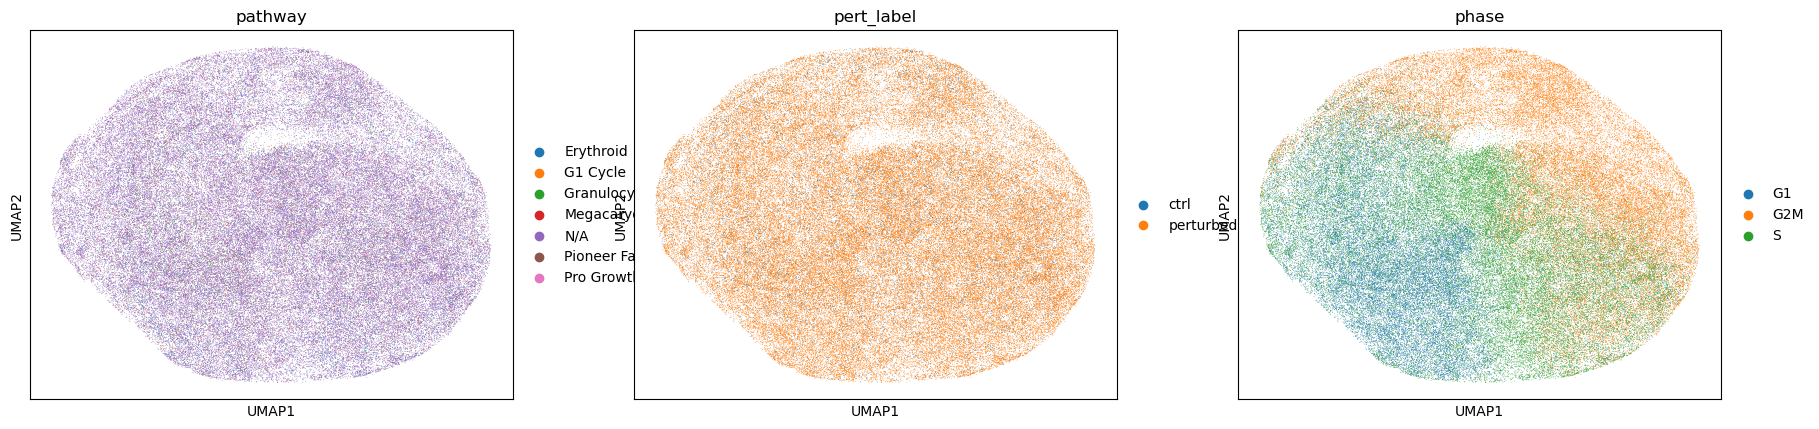

In [13]:
embedding_z = adata_res.obsm['X_umap']
adata_res.obs['pert_label'] = ['ctrl' if i == 'ctrl' else 'perturbed' for i in adata_res.obs['condition'].values]
sc.pl.umap(adata_res, color=['pathway', 'pert_label', 'phase'])

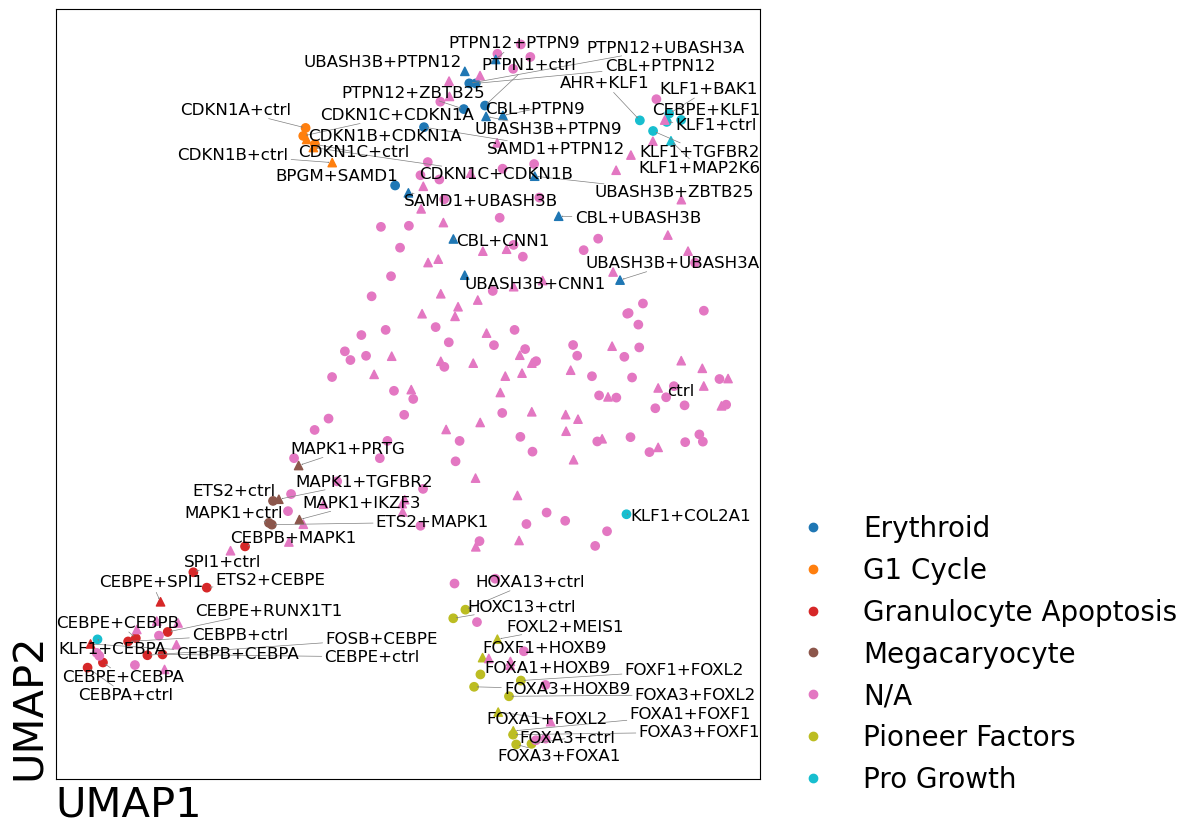

In [14]:
# Get perturbation-related salient embedding

embedding_s = adata_res.uns['s_umap']
df_label = adata_res.uns['emb_s']

from adjustText import adjust_text

le = preprocessing.LabelEncoder()

pathway_ls = []
for p in df_label.index:
    pathway = list(set(adata_processed.obs[adata_processed.obs['condition'].values == p]["pathway"].values))
    pathway_ls.append(pathway[0])

label_ptw = le.fit_transform(pathway_ls)

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(1,2,2)
scatter1 = ax1.scatter(embedding_s[~df_label.index.isin(pert_test), 0], embedding_s[~df_label.index.isin(pert_test), 1], 
                       c=label_ptw[~df_label.index.isin(pert_test)], label=np.array(pathway_ls)[~df_label.index.isin(pert_test)], 
                       cmap='tab10', 
                       rasterized=True)

scatter2 = ax1.scatter(embedding_s[df_label.index.isin(pert_test), 0], embedding_s[df_label.index.isin(pert_test), 1], 
                       c=label_ptw[df_label.index.isin(pert_test)], label=np.array(pathway_ls)[df_label.index.isin(pert_test)], 
                       cmap='tab10', marker='^',
                       rasterized=True)

texts = []
for i in range(df_label.shape[0]):
    if df_label.index[i] == 'ctrl':
        texts.append(plt.text(embedding_s[i][0], embedding_s[i][1], df_label.index[i], fontsize=12, color='black'))
    if label_ptw[i] != 4: # do not plot N/A genes
        texts.append(plt.text(embedding_s[i][0], embedding_s[i][1], df_label.index[i], fontsize=12, color='black'))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5), time_lim=10)

ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax1.set_xlabel('UMAP1', loc='left', fontsize=30)
ax1.set_ylabel('UMAP2', loc='bottom', fontsize=30)
l2 = f.legend(handles=scatter1.legend_elements(num = (len(set(pathway_ls))-1))[0], 
              labels=sorted(set(pathway_ls)), 
              loc="upper left", bbox_to_anchor=(0.9, 0.4), 
                    markerscale=1., title_fontsize=15, fontsize=20, frameon=False, ncol=1)

plt.show()